In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import os
import DiadFit as pf
import datetime

In [2]:
# Charlotte collected this data on June 7th, 0.56 g/cm3 to 1.05 g/cm3
input_file_path=os.getcwd()+'\Input_files'
HPjune_data_path=input_file_path+'/'+"merged_df_wrho-6-7-23.xlsx"

hpjune=pd.read_excel(HPjune_data_path)
hpjune=hpjune.drop(columns=[col for col in hpjune.columns if 'Unnamed' in col])
hpjune['HB_Ratio']=(hpjune['HB2_Area']+hpjune['HB1_Area'])/(hpjune['Diad2_Voigt_Area']+hpjune['Diad1_Voigt_Area'])
hpjune.head()



,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,1117_1447_new,1220_1447_new,1220_1400_new,1117_1400_new,Ne_corr_1447_1117,Ne_corr_1400_1117,Ne_corr_1447_1220,Ne_corr_1400_1220,Ne_corr_1567_1220,HB_Ratio
0,FDCA-P1-1,0.648713,310.15,1.040000,64.871318,66.4600,36.970,36.970,36.970,36.970,...,0.997595,0.997263,1.002603,0.997336,0.997595,0.997350,0.997183,0.996687,0.998433,0.114442
1,FDCA-P1-2,NaN,NaN,NaN,NaN,66.4600,36.970,36.970,36.970,36.970,...,0.997594,0.997262,1.002602,0.997335,0.997594,0.997350,0.997182,0.996686,0.998432,0.113775
2,FDCA-P1-3,NaN,NaN,NaN,NaN,66.4600,36.970,36.970,36.970,36.970,...,0.997594,0.997262,1.002602,0.997335,0.997594,0.997349,0.997182,0.996686,0.998432,0.114532
3,FDCA-P2-1,0.592398,310.15,1.025959,59.239802,60.1811,36.974,36.975,36.976,36.976,...,0.997588,0.997256,1.002594,0.997327,0.997588,0.997340,0.997176,0.996680,0.998425,0.114683
4,FDCA-P2-2,NaN,NaN,NaN,NaN,60.1815,36.976,36.977,36.978,36.979,...,0.997587,0.997256,1.002594,0.997326,0.997587,0.997339,0.997175,0.996679,0.998425,0.115199


In [3]:
# Charlotte collected this data on June 8th, 0.22-0.66 g/cm3. Its the new high pressure sensor, 
# so shows less extreme curves, but still some curve. 
MPjune_HPsens_data_path=input_file_path+'/'+"merged_df_wrho-6-8-23.xlsx"


mpjune_hpsens=pd.read_excel(MPjune_HPsens_data_path)
mpjune_hpsens=mpjune_hpsens.drop(columns=[col for col in mpjune_hpsens.columns if 'Unnamed' in col])
mpjune_hpsens['HB_Ratio']=(mpjune_hpsens['HB2_Area']+mpjune_hpsens['HB1_Area'])/(mpjune_hpsens['Diad2_Voigt_Area']+mpjune_hpsens['Diad1_Voigt_Area'])
mpjune_hpsens.head()

,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,1117_1447_new,1220_1447_new,1220_1400_new,1117_1400_new,Ne_corr_1447_1117,Ne_corr_1400_1117,Ne_corr_1447_1220,Ne_corr_1400_1220,Ne_corr_1567_1220,HB_Ratio
0,FDCA-P28-1,0.095909,310.15,0.660905,9.590924,9.6752,36.975,36.976,36.976,36.976,...,0.997535,0.997188,1.002531,0.997279,0.997279,0.997301,0.997128,0.996619,0.998368,0.130649
1,FDCA-P29-1,0.093876,310.15,0.646865,9.387566,9.4594,37.002,37.003,37.003,37.003,...,0.997536,0.997192,1.002530,0.997279,0.997279,0.997302,0.997131,0.996622,0.998369,0.133692
2,FDCA-P30-1,0.092172,310.15,0.632824,9.217169,9.2497,36.978,36.980,36.981,36.982,...,0.997536,0.997192,1.002530,0.997279,0.997279,0.997302,0.997131,0.996622,0.998369,0.130422
3,FDCA-P31-1,0.090746,310.15,0.618784,9.074609,9.0269,36.995,36.994,36.993,36.993,...,0.997537,0.997196,1.002531,0.997280,0.997280,0.997303,0.997134,0.996625,0.998370,0.133847
4,FDCA-P32-1,0.089553,310.15,0.604743,8.955350,8.9823,37.015,37.015,37.015,37.016,...,0.997538,0.997197,1.002531,0.997280,0.997280,0.997304,0.997135,0.996626,0.998370,0.135589


In [4]:
# This data was collected on June 1st and 2nd by Penny Wieser, using the new low P sensor, 
# densities ranging from 0.009 to 0.68 g/cm3 (because sensor tops out at 10 MPa)
# Day 1 was 0.2-0.68, Day 2 (June 2nd) was very low densities. 
PW_data_path=input_file_path+'/'+"merged_df_wrho_PWdata.xlsx"

lpmpjune=pd.read_excel(PW_data_path)
lpmpjune=lpmpjune.drop(columns=[col for col in lpmpjune.columns if 'Unnamed' in col])
lpmpjune['Corr_Split_1σ_val']=lpmpjune['Corr_Split+1σ']-lpmpjune['Corrected_Splitting']
lpmpjune['HB_Ratio']=(lpmpjune['HB2_Area']+lpmpjune['HB1_Area'])/(lpmpjune['Diad2_Voigt_Area']+lpmpjune['Diad1_Voigt_Area'])

lpmpjune.head()


,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,...,1220_1447_new,1220_1400_new,1117_1400_new,Ne_corr_1447_1117,Ne_corr_1400_1117,Ne_corr_1447_1220,Ne_corr_1400_1220,Ne_corr_1567_1220,Corr_Split_1σ_val,HB_Ratio
0,104.317427,104.319067,104.315787,12 C6_CRR_DiadFit,104.569330,0.002040,0.001474,1282.899792,0.001234,8503.996689,...,0.997239,1.002552,0.997290,0.997592,0.997387,0.997225,0.996741,0.998445,0.001640,0.110024
1,104.253899,104.255586,104.252212,14 C7_CRR_DiadFit,104.506344,0.002089,0.001527,1283.055183,0.001320,4159.640332,...,0.997233,1.002546,0.997285,0.997585,0.997375,0.997215,0.996729,0.998437,0.001687,0.109616
2,104.191284,104.193021,104.189548,16 C8,104.444319,0.002222,0.001583,1283.206389,0.001248,2439.022384,...,0.997228,1.002543,0.997282,0.997578,0.997364,0.997204,0.996717,0.998428,0.001736,0.116723
3,104.187881,104.189711,104.186050,17 C9,104.441140,0.002336,0.001687,1283.204984,0.001410,2470.540943,...,0.997226,1.002540,0.997280,0.997576,0.997360,0.997201,0.996714,0.998425,0.001831,0.108611
4,104.039708,104.041630,104.037786,19 C10,104.293657,0.002524,0.001787,1283.523492,0.001324,2413.101156,...,0.997218,1.002530,0.997271,0.997566,0.997345,0.997186,0.996697,0.998413,0.001922,0.107349


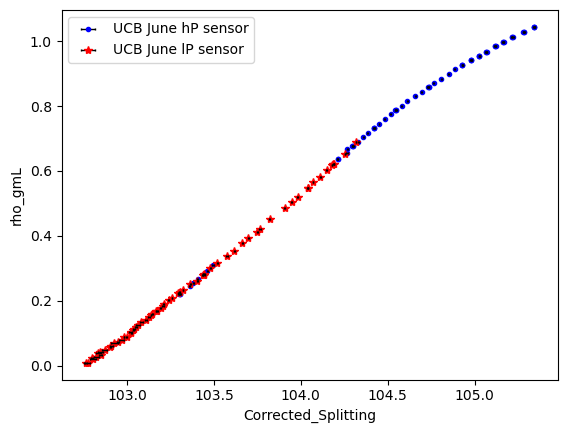

In [5]:
# Filter out bad ones from the high pressure sensor and concatenate the frames 
test=mpjune_hpsens.drop(columns=['Offset','filename_merge'])
hpsens_june=pd.concat([test,hpjune])

cali_pts_hpsens=hpsens_june[~(hpsens_june['rho_gmL'].between(0.325,0.63))]

# Filter out bad ones from low pressure sensor and concat frames
lpsens_june=lpmpjune.copy()
cali_pts_lpsens=lpsens_june[~(lpsens_june['rho_gmL'].between(0.46,0.48))]
cali_pts_lpsens = cali_pts_lpsens.replace([np.inf, -np.inf], np.nan)

cali_pts_lpsens = cali_pts_lpsens.dropna(subset=['rho_gmL'])

fig,ax=plt.subplots()

x='Corrected_Splitting'
y='rho_gmL'
y_pw='rho_gmL'


ax.errorbar(x=cali_pts_hpsens[x],y=cali_pts_hpsens[y], xerr=cali_pts_hpsens['Corr_Split_1σ_val'], fmt='.',
             color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June hP sensor')


ax.errorbar(x=cali_pts_lpsens[x],y=cali_pts_lpsens[y_pw], xerr=cali_pts_lpsens['Corr_Split_1σ_val'], fmt='*',
             color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June lP sensor')

ax.set_xlabel(x)
ax.set_ylabel(y)

plt.legend()


plt.show()

## New densimeter function with blending between polynomials

## Lets define the calibration points for simplicity

In [6]:
x_poly=pd.concat([cali_pts_hpsens[x],cali_pts_lpsens[x] ]).reset_index(drop=True)
y_poly=pd.concat([cali_pts_hpsens[y],cali_pts_lpsens[y_pw] ]).reset_index(drop=True)

# Lets define a useful linspace here
x_fit = np.linspace(np.min(x_poly), np.max(x_poly), 500)

Index(['Smoothed_Density', 'Smoothed_Density_σ', 'Smoothed_Density+1σ',
       'Smoothed_Density-1σ', 'Smoothed_Density_σ_dens',
       'Smoothed_Density_σ_split'],
      dtype='object')


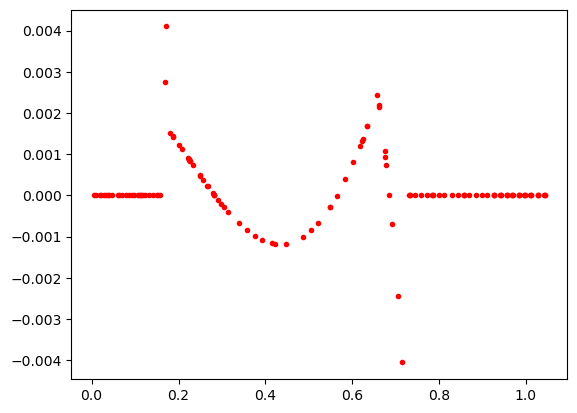

In [16]:
Density_array_UCB_data=pf.calculate_density_ucb_new(corrected_split=pd.Series(x_poly), split_err=0, 
                                                    temp='SupCrit')

Density_array_UCB_dataold=pf.calculate_density_ucb(corrected_split=pd.Series(x_poly), split_err=0, 
                                                    temp='SupCrit')
plt.plot(Density_array_UCB_data['Density g/cm3'], Density_array_UCB_data['Density g/cm3']-Density_array_UCB_dataold['Density g/cm3'], '.r')

===== Piecemeal =====
R²    : 0.99995
RMSE  : 0.00239 g/cm3
MAE   : 0.00178 g/cm3

===== DENSIMETER =====
R²    : 0.99995
RMSE  : 0.00249 g/cm3
MAE   : 0.00185 g/cm3


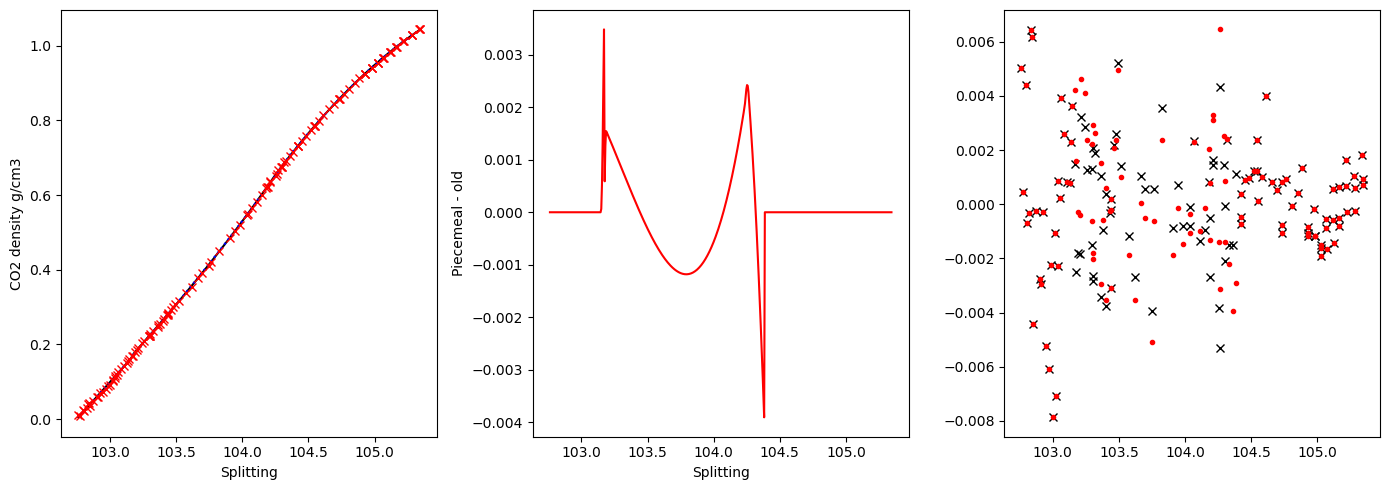

In [17]:
P_piecewise, model=pf.build_piecewise_poly_by_density(x_poly, y_poly, y_bounds=(0.17, 0.65), degrees=(1, 3, 2), blend_width=0.02, 
                                               save_path=r"C:\Users\penny\Box\Berkeley_new\Raman\FI_Standards\smoothed_polyfit_June25_UCB.pkl")

## Lets build it up for the data
Calc_P_piecewise_data=P_piecewise(x_poly)
# Lets do it for the linspace
Calc_P_piecewise_lin=P_piecewise(x_fit)
# Lets do it for our old densimeter
Density_array_UCB_lin=pf.calculate_density_ucb(corrected_split=pd.Series(x_fit), split_err=0, 
                                                    temp='SupCrit')
Density_array_UCB_data=pf.calculate_density_ucb(corrected_split=pd.Series(x_poly), split_err=0, 
                                                    temp='SupCrit')



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,5))
ax1.plot(x_fit,Calc_P_piecewise_lin, '-k', label='new piecemeal')
ax1.plot(x_fit, Density_array_UCB_lin['Density g/cm3'], ':b')
ax1.plot(x_poly, y_poly, 'xr')
ax1.set_xlabel('Splitting')
ax1.set_ylabel('CO2 density g/cm3')

# Now lets calculate the difference
Diff_new_old=Calc_P_piecewise_lin-Density_array_UCB_lin['Density g/cm3']
ax2.plot(x_fit, Diff_new_old, '-r')
ax2.set_ylabel('Piecemeal - old')
ax2.set_xlabel('Splitting')

# Lets look at residuals
# Piece meal residuals
ax3.plot(x_poly, y_poly-Calc_P_piecewise_data, 'xk', label='')
ax3.plot(x_poly, y_poly-Density_array_UCB_data['Density g/cm3'], '.r', label='')



fig.tight_layout()
## Calculate statistics for how they do 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# ---- Piecemeal MODEL ----
r2_poly = r2_score(y_poly, Calc_P_piecewise_data)
rmse_poly = np.sqrt(mean_squared_error(y_poly, Calc_P_piecewise_data))
mae_poly = mean_absolute_error(y_poly, Calc_P_piecewise_data)

# ---- DENSIMETER MODEL ----
r2_dens = r2_score(y_poly, Density_array_UCB_data['Density g/cm3'])
rmse_dens = np.sqrt(mean_squared_error(y_poly, Density_array_UCB_data['Density g/cm3']))
mae_dens = mean_absolute_error(y_poly, Density_array_UCB_data['Density g/cm3'])


# ---- PRINT ----
print("===== Piecemeal =====")
print(f"R²    : {r2_poly:.5f}")
print(f"RMSE  : {rmse_poly:.5f} g/cm3")
print(f"MAE   : {mae_poly:.5f} g/cm3")

print("\n===== DENSIMETER =====")
print(f"R²    : {r2_dens:.5f}")
print(f"RMSE  : {rmse_dens:.5f} g/cm3")
print(f"MAE   : {mae_dens:.5f} g/cm3")


In [9]:
Density_array_UCB_lin['Preferred D_σ_Ne']

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: Preferred D_σ_Ne, Length: 500, dtype: int64

## Lets practice dumping it and seeing what we get


In [10]:
def load_piecewise_model(pickle_path):
    with open(pickle_path, 'rb') as f:
        model_data = pickle.load(f)

    coeffs = model_data['coeffs']
    y_bounds = model_data['y_bounds']
    blend_width = model_data['blend_width']
    x_low_med = model_data['x_low_med']
    x_med_high = model_data['x_med_high']

    polys = [np.poly1d(c) for c in coeffs]

    def f_base(x_input):
        x_arr = np.asarray(x_input)
        result = np.full_like(x_arr, np.nan, dtype=float)

        low_mask = x_arr < (x_low_med - blend_width)
        mid_mask = (x_arr > (x_low_med + blend_width)) & (x_arr < (x_med_high - blend_width))
        high_mask = x_arr > (x_med_high + blend_width)

        result[low_mask] = polys[0](x_arr[low_mask])
        result[mid_mask] = polys[1](x_arr[mid_mask])
        result[high_mask] = polys[2](x_arr[high_mask])

        blend_lm = (x_arr >= (x_low_med - blend_width)) & (x_arr <= (x_low_med + blend_width))
        w_lm = blend_weights(x_arr[blend_lm], x_low_med - blend_width, x_low_med + blend_width)
        result[blend_lm] = (1 - w_lm) * polys[0](x_arr[blend_lm]) + w_lm * polys[1](x_arr[blend_lm])

        blend_mh = (x_arr >= (x_med_high - blend_width)) & (x_arr <= (x_med_high + blend_width))
        w_mh = blend_weights(x_arr[blend_mh], x_med_high - blend_width, x_med_high + blend_width)
        result[blend_mh] = (1 - w_mh) * polys[1](x_arr[blend_mh]) + w_mh * polys[2](x_arr[blend_mh])

        return result

    return f_base


## Lets try a single polynomial

C:\Users\penny\AppData\Local\Temp\ipykernel_27680\217914113.py:5: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_poly, y_poly, N)


NameError: name 'Density_array_UCB_linspace' is not defined

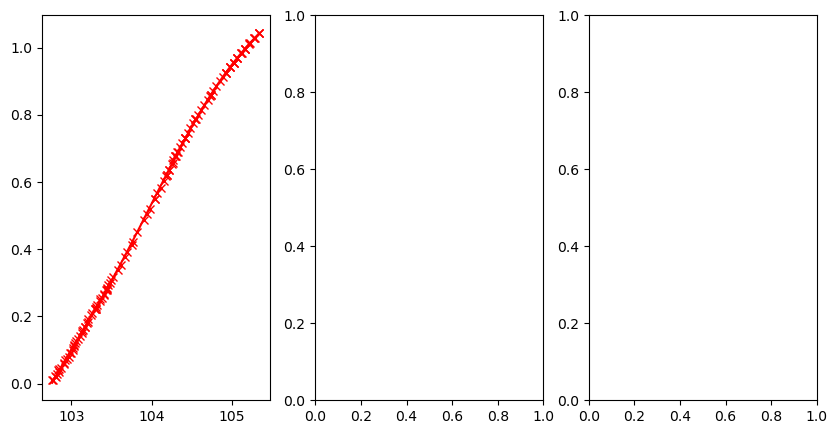

In [11]:

# Example degree
N = 6

# Fit polynomial
coeffs = np.polyfit(x_poly, y_poly, N)

# Create a polynomial function
p = np.poly1d(coeffs)

# Plot original data and fitted curve

y_fit = p(x_fit)



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
ax1.plot(x_poly, y_poly, 'xr')
# plt.errorbar(x=cali_pts_hpsens[x],y=cali_pts_hpsens[y], xerr=cali_pts_hpsens['Corr_Split_1σ_val'], fmt='.',
#              color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
#            label='UCB June hP sensor')


# plt.errorbar(x=cali_pts_lpsens[x],y=cali_pts_lpsens[y_pw], xerr=cali_pts_lpsens['Corr_Split_1σ_val'], fmt='*',
#              color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
#            label='UCB June lP sensor')

ax1.plot(x_fit, y_fit, '-r')
ax1.plot(x_fit, Density_array_UCB_linspace['Density g/cm3'], ':k')
ax1.plot(x_fit, Density_array_UCB_linspace_blend['Density g/cm3'], '-g')
# Predicted using the 3 step method of Charlotte
Pred_Density_current=pf.calculate_density_ucb(corrected_split=x_poly, split_err=0, 
                                                    temp='SupCrit')
Pred_Density_current_blend=calculate_density_ucb_blend(corrected_split=x_poly, split_err=0, 
                                                    temp='SupCrit', blend_width=0.03)
# predicted using the new poly
Pred_Density_poly=p(x_poly)


ax2.plot(y_poly, Pred_Density_current['Density g/cm3']-y_poly, 'xr', label='CD approach')

ax2.plot(y_poly, Pred_Density_poly-y_poly, '.k', label='new poly')
ax3.plot(y_fit, y_fit-Density_array_UCB_linspace['Density g/cm3'], '.r')
ax2.legend()
fig.tight_layout()

In [ ]:
Density_array_UCB_linspace_blend=calculate_density_ucb_blend(corrected_split=pd.Series(x_fit), split_err=0, 
                                                    temp='SupCrit', blend_width = 0.03)



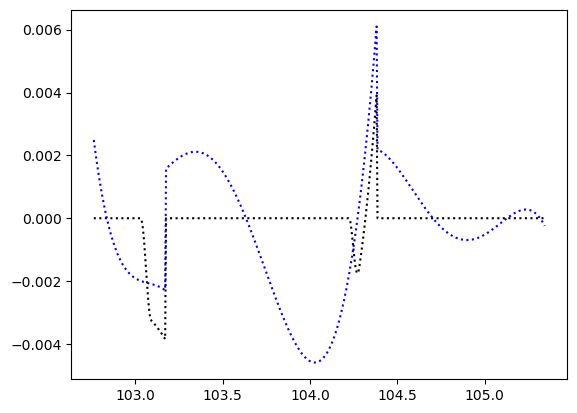

In [ ]:
plt.plot(x_fit, Density_array_UCB_linspace['Density g/cm3']-Density_array_UCB_linspace_blend['Density g/cm3'], ':k', label='blend')
plt.plot(x_fit, Density_array_UCB_linspace['Density g/cm3']-y_fit, ':b', label='poly')
#

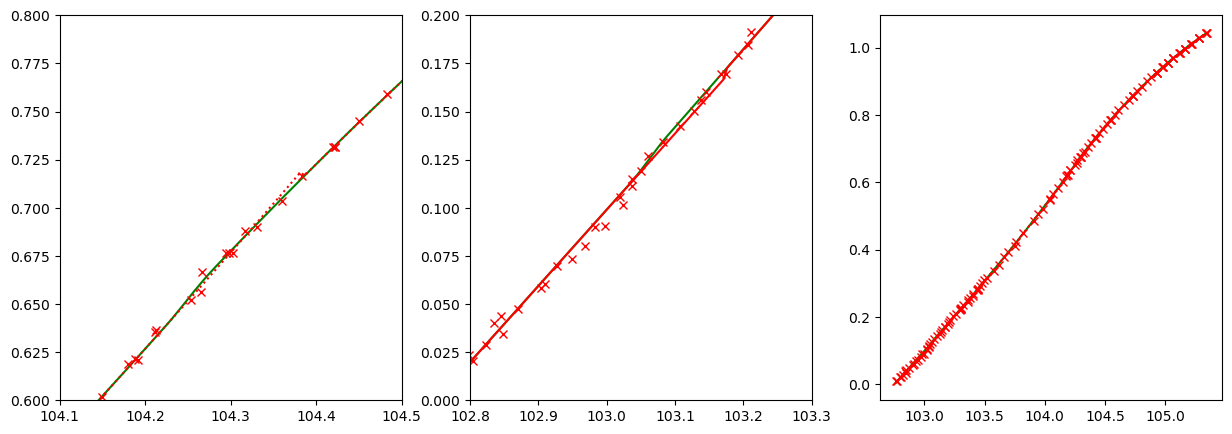

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot(x_fit, Density_array_UCB_linspace_blend['Density g/cm3'], '-g', label='blend')
ax1.plot(x_fit, Density_array_UCB_linspace['Density g/cm3'], ':r', label='original')
ax1.plot(x_poly, y_poly, 'xr')
ax1.set_xlim([104.1, 104.5])
ax1.set_ylim([0.6, 0.8])

ax2.plot(x_fit, Density_array_UCB_linspace_blend['Density g/cm3'], '-g', label='blend')
ax2.plot(x_fit, Density_array_UCB_linspace['Density g/cm3'], '-r', label='original')
ax2.plot(x_poly, y_poly, 'xr')
ax2.set_xlim([102.8, 103.3])
ax2.set_ylim([0, 0.2])


ax3.plot(x_fit, Density_array_UCB_linspace_blend['Density g/cm3'], '-g', label='blend')
ax3.plot(x_fit, Density_array_UCB_linspace['Density g/cm3'], ':r', label='original')
ax3.plot(x_poly, y_poly, 'xr')


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# ---- POLYNOMIAL MODEL ----
r2_poly = r2_score(y_poly, Pred_Density_poly)
rmse_poly = np.sqrt(mean_squared_error(y_poly, Pred_Density_poly))
mae_poly = mean_absolute_error(y_poly, Pred_Density_poly)

# ---- DENSIMETER MODEL ----
r2_dens = r2_score(y_poly, Pred_Density_current['Density g/cm3'])
rmse_dens = np.sqrt(mean_squared_error(y_poly, Pred_Density_current['Density g/cm3']))
mae_dens = mean_absolute_error(y_poly, Pred_Density_current['Density g/cm3'])

# ---- DENSIMETER MODEL ----
r2_dens_blend = r2_score(y_poly, Pred_Density_current_blend['Density g/cm3'])
rmse_dens_blend = np.sqrt(mean_squared_error(y_poly, Pred_Density_current_blend['Density g/cm3']))
mae_dens_blend = mean_absolute_error(y_poly, Pred_Density_current_blend['Density g/cm3'])


# ---- PRINT ----
print("===== POLYNOMIAL (degree {}) =====".format(N))
print(f"R²    : {r2_poly:.5f}")
print(f"RMSE  : {rmse_poly:.5f} g/cm3")
print(f"MAE   : {mae_poly:.5f} g/cm3")

print("\n===== DENSIMETER =====")
print(f"R²    : {r2_dens:.5f}")
print(f"RMSE  : {rmse_dens:.5f} g/cm3")
print(f"MAE   : {mae_dens:.5f} g/cm3")

print("\n===== DENSIMETER BLEND =====")
print(f"R²    : {r2_dens_blend:.5f}")
print(f"RMSE  : {rmse_dens_blend:.5f} g/cm3")
print(f"MAE   : {mae_dens_blend:.5f} g/cm3")



===== POLYNOMIAL (degree 6) =====
R²    : 0.99991
RMSE  : 0.00326 g/cm3
MAE   : 0.00250 g/cm3

===== DENSIMETER =====
R²    : 0.99995
RMSE  : 0.00249 g/cm3
MAE   : 0.00185 g/cm3

===== DENSIMETER BLEND =====
R²    : 0.99995
RMSE  : 0.00239 g/cm3
MAE   : 0.00176 g/cm3


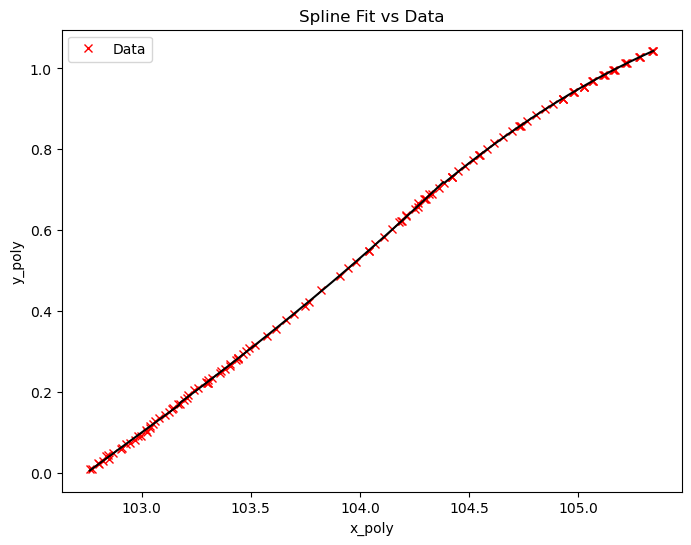

In [ ]:
x_poly=pd.concat([cali_pts_hpsens[x],cali_pts_lpsens[x] ]).reset_index(drop=True)
y_poly=pd.concat([cali_pts_hpsens[y],cali_pts_lpsens[y_pw] ]).reset_index(drop=True)

## Spline

sorted_idx = np.argsort(x_poly)
x_sorted = x_poly.values[sorted_idx]
y_sorted = y_poly.values[sorted_idx]

from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

# Example smoothing factor — if s=0 → interpolates exactly
# You can tune "s" — start with s=0, then try small positive values
spline = UnivariateSpline(x_sorted, y_sorted, s=0.002)

# Evaluate spline on fine grid
x_fit = np.linspace(np.min(x_poly), np.max(x_poly), 500)
y_spline_fit = spline(x_fit)

## Now lets plot the current densimeter 

Density_array_UCB_linspace=pf.calculate_density_ucb(corrected_split=pd.Series(x_fit), split_err=0, 
                                                    temp='SupCrit')




# Plot original data and spline
plt.figure(figsize=(8,6))
plt.plot(x_poly, y_poly, 'xr', label='Data')
#plt.plot(x_fit, y_spline_fit, '-k', label='Spline fit')
plt.plot(x_fit, Density_array_UCB_linspace['Density g/cm3'], '-k')
plt.xlabel('x_poly')
plt.ylabel('y_poly')
plt.legend()
plt.title('Spline Fit vs Data')
plt.show()




# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
# ax1.plot(x_poly, y_poly, 'xr')

# ax1.plot(x_fit, y_fit, '-r')


# # Predicted using the 3 step method of Charlotte
# Pred_Density_current=pf.calculate_density_ucb(corrected_split=x_poly, split_err=0, 
#                                                     temp='SupCrit')
# # predicted using the new poly
# Pred_Density_poly=p(x_poly)


# ax2.plot(y_poly, Pred_Density_current['Density g/cm3']-y_poly, 'xr', label='CD approach')

# ax2.plot(y_poly, Pred_Density_poly-y_poly, '.k', label='new poly')
# ax3.plot(y_fit, y_fit-Density_array_UCB_linspace['Density g/cm3'], '.r')
# ax2.legend()
# fig.tight_layout()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# ---- POLYNOMIAL MODEL ----
r2_poly = r2_score(y_poly, Pred_Density_poly)
rmse_poly = np.sqrt(mean_squared_error(y_poly, Pred_Density_poly))
mae_poly = mean_absolute_error(y_poly, Pred_Density_poly)

# ---- DENSIMETER MODEL ----
r2_dens = r2_score(y_poly, Pred_Density_current['Density g/cm3'])
rmse_dens = np.sqrt(mean_squared_error(y_poly, Pred_Density_current['Density g/cm3']))
mae_dens = mean_absolute_error(y_poly, Pred_Density_current['Density g/cm3'])

# ---- PRINT ----
print("===== POLYNOMIAL (degree {}) =====".format(N))
print(f"R²    : {r2_poly:.4f}")
print(f"RMSE  : {rmse_poly:.5f} g/cm3")
print(f"MAE   : {mae_poly:.5f} g/cm3")

print("\n===== DENSIMETER =====")
print(f"R²    : {r2_dens:.4f}")
print(f"RMSE  : {rmse_dens:.5f} g/cm3")
print(f"MAE   : {mae_dens:.5f} g/cm3")


===== POLYNOMIAL (degree 12) =====
R²    : 0.9999
RMSE  : 0.00271 g/cm3
MAE   : 0.00215 g/cm3

===== DENSIMETER =====
R²    : 0.9999
RMSE  : 0.00249 g/cm3
MAE   : 0.00185 g/cm3


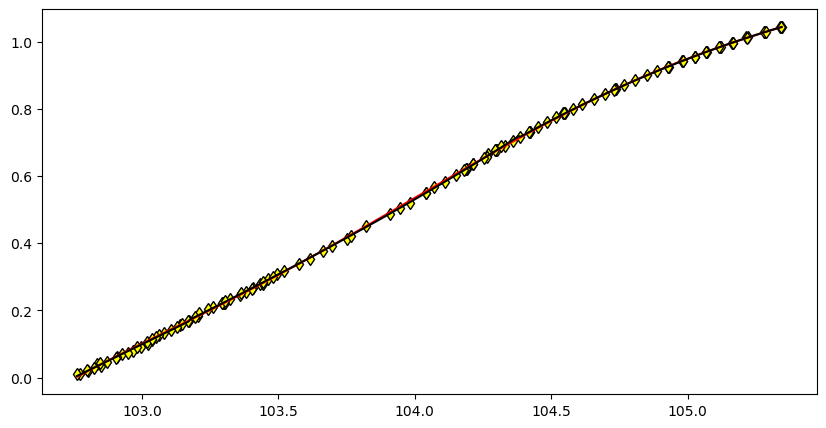

In [ ]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
ax1.plot(x_poly, y_poly, 'dk', mfc='yellow')
# plt.errorbar(x=cali_pts_hpsens[x],y=cali_pts_hpsens[y], xerr=cali_pts_hpsens['Corr_Split_1σ_val'], fmt='.',
#              color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
#            label='UCB June hP sensor')


# plt.errorbar(x=cali_pts_lpsens[x],y=cali_pts_lpsens[y_pw], xerr=cali_pts_lpsens['Corr_Split_1σ_val'], fmt='*',
#              color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
#            label='UCB June lP sensor')

ax1.plot(x_fit, y_fit, '-r')
ax1.plot(x_fit, Density_array_UCB_linspace['Density g/cm3'], '-k')

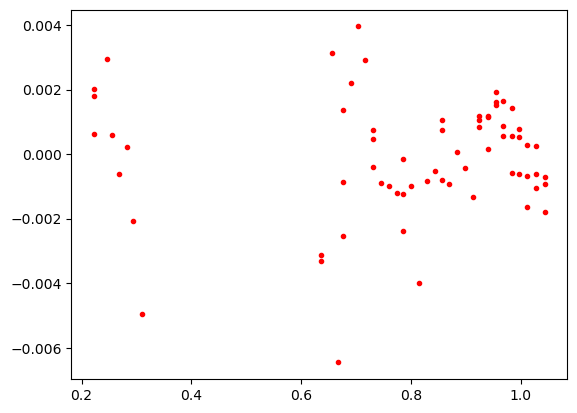

In [ ]:
df_hpsens=pf.calculate_density_ucb(corrected_split=cali_pts_hpsens[x].reset_index(drop=True), split_err=cali_pts_hpsens['Corr_Split_1σ_val'].reset_index(drop=True),
temp='SupCrit', CI_split=0.67, CI_neon=0.67)

df_hpsens=pf.calculate_density_ucb(corrected_split=cali_pts_hpsens[x].reset_index(drop=True), split_err=cali_pts_hpsens['Corr_Split_1σ_val'].reset_index(drop=True),
temp='SupCrit', CI_split=0.67, CI_neon=0.67)

plt.plot(cali_pts_hpsens[y].reset_index(drop=True), df_hpsens['Density g/cm3']-cali_pts_hpsens[y].reset_index(drop=True), '.r' )

In [ ]:
full=pd.concat([pd.DataFrame(data={'Split':cali_pts_hpsens[x],'rho':cali_pts_hpsens[y],'spliterr':cali_pts_hpsens['Corr_Split_1σ_val']}),
                pd.DataFrame(data={'Split':cali_pts_lpsens[x],'rho':cali_pts_lpsens[y_pw],'spliterr':cali_pts_lpsens['Corr_Split_1σ_val']})])
full_sort=full.sort_values('rho')
# plt.scatter(full_sort['Split'],full_sort['rho'])

In [ ]:
full.to_excel('UCB_Cali_data_combined.xlsx')

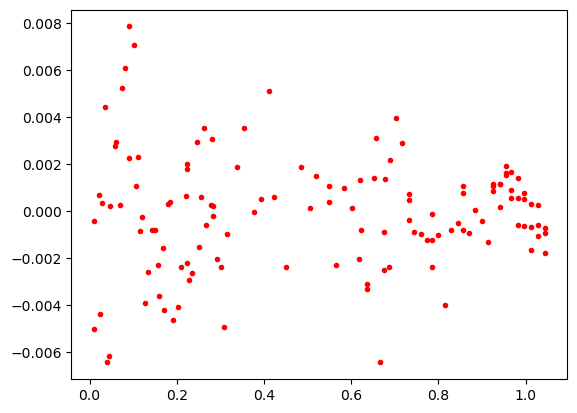

In [ ]:
full_dens=pf.calculate_density_ucb(corrected_split=full['Split'].reset_index(drop=True), split_err=full['spliterr'].reset_index(drop=True),
temp='SupCrit', CI_split=0.67, CI_neon=0.67)

plt.plot(full['rho'].reset_index(drop=True),full_dens['Density g/cm3']-full['rho'].reset_index(drop=True), '.r' )

In [ ]:
cali_pts_hpsens['power (mW)']

0     34.002
1     33.916
2     33.929
24    34.233
25    34.406
       ...  
49    34.008
50    33.997
51    34.000
52    34.029
53    34.006
Name: power (mW), Length: 66, dtype: float64

In [ ]:
full_HB=pd.concat([pd.DataFrame(data={'Split':cali_pts_hpsens[x],'rho':cali_pts_hpsens[y],'HB_Ratio':cali_pts_hpsens['HB_Ratio'],
                                      'power (mW)':cali_pts_hpsens['power (mW)']
                                      }),
                pd.DataFrame(data={'Split':cali_pts_lpsens[x],'rho':cali_pts_lpsens[y_pw],'HB_Ratio':cali_pts_lpsens['HB_Ratio'],
                                   'power (mW)':cali_pts_lpsens['power (mW)']
                                   
                                   })])
full_HB_sort=full_HB.sort_values('rho')
# plt.scatter(full_sort['Split'],full_sort['rho'])

C:\Users\penny\AppData\Local\Temp\ipykernel_17260\2867192774.py:5: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(s)


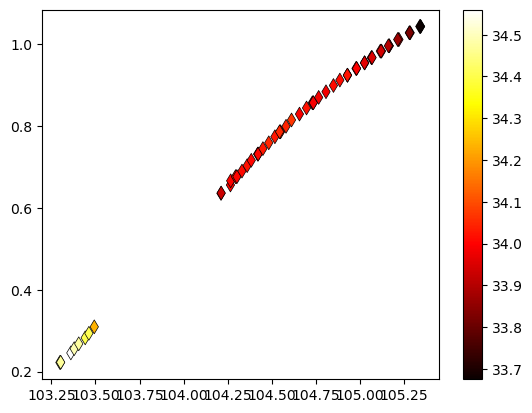

In [ ]:
#plt.plot(full_HB_sort['Split'], full_HB_sort['rho'], '.r')

s=plt.scatter(full_HB_sort['Split'], full_HB_sort['rho'], marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=full_HB_sort['power (mW)'], cmap='hot')
fig.colorbar(s)

C:\Users\penny\AppData\Local\Temp\ipykernel_17260\2664898834.py:7: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  fig.colorbar(s)


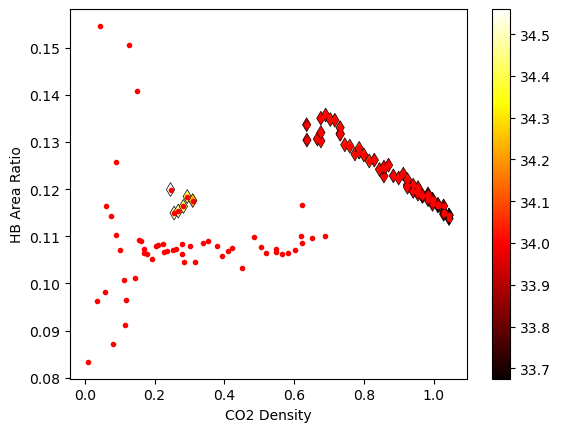

In [ ]:
plt.plot(full_HB_sort['rho'], full_HB_sort['HB_Ratio'], '.r')
plt.xlabel('CO2 Density')
plt.ylabel('HB Area Ratio')

s=plt.scatter(full_HB_sort['rho'], full_HB_sort['HB_Ratio'], marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=full_HB_sort['power (mW)'], cmap='hot')
fig.colorbar(s)


In [ ]:
full_HB_sort.to_excel('Hotband_cali.xlsx')

In [ ]:
full_HB_sort

,Split,rho,HB_Ratio,power (mW)
55,102.773358,0.009599,NaN,NaN
61,102.762360,0.009822,0.083344,NaN
54,102.803922,0.020584,NaN,NaN
60,102.798145,0.023385,NaN,NaN
53,102.823215,0.028575,NaN,NaN
...,...,...,...,...
4,105.279822,1.028444,0.115199,33.832
3,105.281586,1.028451,0.114683,33.825
2,105.342879,1.043820,0.114532,33.689
1,105.343871,1.043831,0.113775,33.688


In [ ]:
np.max(full_HB_sort['Split'])

105.3438707618937

In [ ]:
C:\Users\penny\Box\Berkeley_new\DiadFit_outer\docs\UCB_Densimeter_fitting\Hotband_cali.xlsx

SyntaxError: unexpected character after line continuation character (878617784.py, line 1)

In [ ]:
Split_col='Split'
CO2_dens_col='rho'
split_error='spliterr'
CO2_dens_error=0.01
save_suffix='UCB_1117_1447'
eq_division='ccmr'


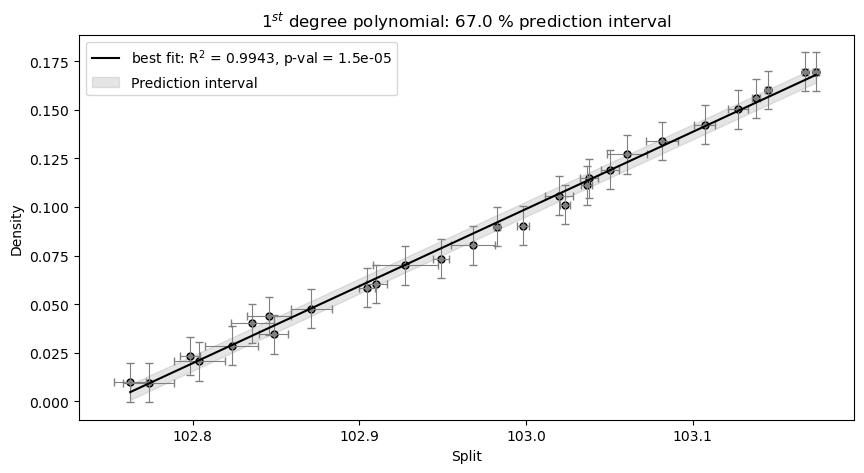

In [ ]:
CI=0.67
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


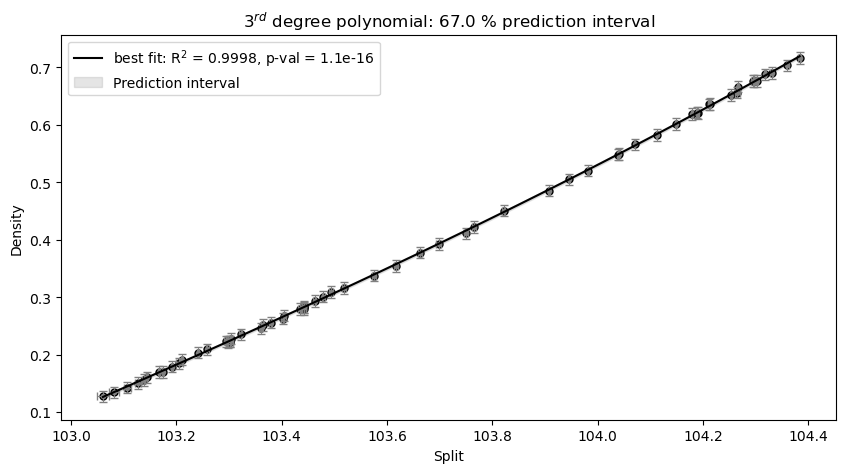

In [ ]:
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort,Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Medium',N_poly=3, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


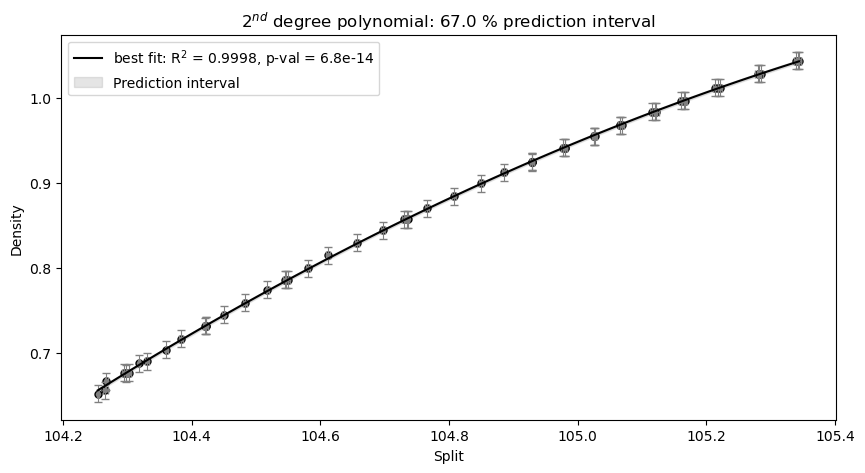

In [ ]:
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)

In [ ]:
## Now lets work out difference

In [ ]:

    # This gets the densimeter at low density
        pickle_str_lowr='Lowrho_polyfit_dataUCB_1220_1447.pkl'
        with open(DiadFit_dir/pickle_str_lowr, 'rb') as f:
            lowrho_pickle_data = pickle.load(f)

        # This gets the densimeter at medium density
        pickle_str_medr='Mediumrho_polyfit_dataUCB_1220_1447.pkl'
        with open(DiadFit_dir/pickle_str_medr, 'rb') as f:
            medrho_pickle_data = pickle.load(f)
        # This gets the densimeter at high density.
        pickle_str_highr='Highrho_polyfit_dataUCB_1220_1447.pkl'
        with open(DiadFit_dir/pickle_str_highr, 'rb') as f:
            highrho_pickle_data = pickle.load(f)

IndentationError: unexpected indent (1070283516.py, line 2)